In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Resturantdata.csv')
df.head()

,Names,Prices,Neighbourhoods,Number_of_reviews,Ratings,Type_of_resturant
0,Stadtklause,€,Kreuzberg,171,4.5,German
1,Schnitzelei Mitte,€€€,Mitte,51,4.5,Schnitzel
2,Momotaro Tavern,€€,Mitte,60,4.5,BurgersAsian Fusion
3,Aigner Gendarmenmarkt,€€€,Mitte,120,4.0,GermanAustrian
4,Ngon Restaurant Berlin,NaN,NaN,20,4.5,VietnamesePan AsianMitte


In [4]:
#Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Names              240 non-null    object 
 1   Prices             202 non-null    object 
 2   Neighbourhoods     202 non-null    object 
 3   Number_of_reviews  240 non-null    int64  
 4   Ratings            240 non-null    float64
 5   Type_of_resturant  240 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.4+ KB


In [5]:
#Normalizing the ratings and number of reviews 

rating_min = df['Ratings'].min()
rating_max = df['Ratings'].max()
review_min = df['Number_of_reviews'].min()
review_max = df['Number_of_reviews'].max()

In [6]:
#Creating new coulmns for the normalized rating and reviews
df['Normalized_rating']=df['Ratings'].apply(lambda x: (x - rating_min)/(rating_max - rating_min) )
df['Normalized_reviews'] = df['Number_of_reviews'].apply(lambda x: (x - review_min)/(review_max - review_min) )

Text(0.5, 1.0, 'Hit location for resturant')

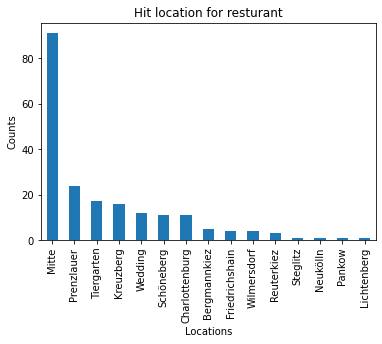

In [49]:
#Hit location for resturants 
df['Neighbourhoods'].value_counts().plot(kind = 'bar' )
plt.xlabel('Locations')
plt.ylabel('Counts')
plt.title('Hit location for resturant')

Text(0.5, 1.0, 'Percentage of location of the resturants')

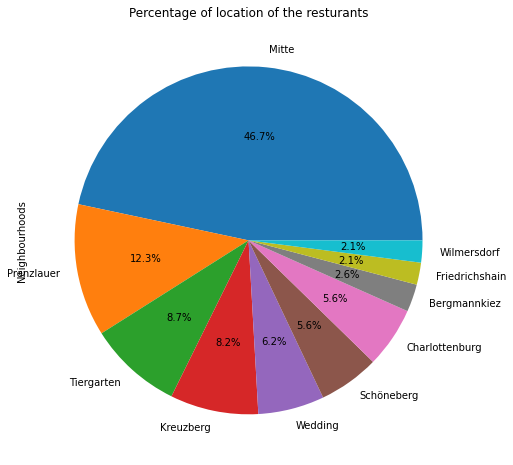

In [53]:
df['Neighbourhoods'].value_counts().nlargest(10).plot(kind = 'pie',figsize=(8,8), autopct = '%1.1f%%')
plt.title('Percentage of location of the resturants')

Text(0.5, 1.0, 'Location with the highest rating')

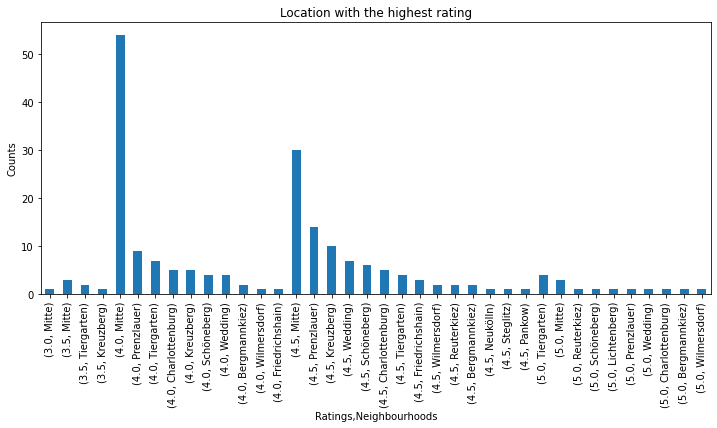

In [28]:
#checking locating rating
df[['Neighbourhoods','Ratings']].groupby('Ratings').value_counts().plot(kind='bar',figsize=(12,5))
plt.ylabel('Counts')
plt.title('Location with the highest rating')

<AxesSubplot:xlabel='Prices,Ratings'>

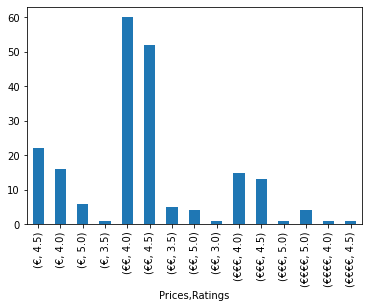

In [63]:
df[['Ratings','Prices']].groupby(['Prices']).value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Neighbourhoods'>

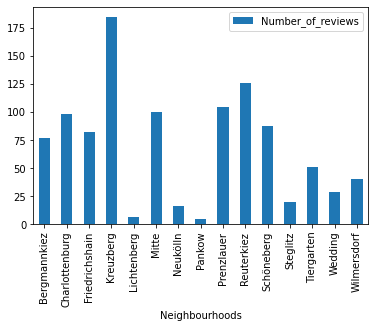

In [81]:
# Neighbourhoods
df[['Neighbourhoods','Number_of_reviews']].groupby(['Neighbourhoods']).mean().plot(kind='bar')

In [100]:
df['Type_of_resturant'].value_counts().nlargest(15)

German             22
Italian            11
Modern European     6
French              5
Ramen               4
Thai                4
Korean              4
Greek               3
ItalianPizza        3
Vietnamese          3
Mexican             3
Austrian            3
Schnitzel           3
Indian              3
Japanese            3
Name: Type_of_resturant, dtype: int64

In [102]:
df[['Type_of_resturant','Ratings']].groupby('Type_of_resturant').value_counts().nlargest(15)

Type_of_resturant   Ratings
German              4.5        12
                    4.0         9
Italian             4.5         5
                    4.0         5
French              4.5         4
Greek               4.5         3
Korean              4.0         3
Mexican             4.0         3
Ramen               4.0         3
Thai                4.5         3
Austrian            4.5         2
Chinese             4.5         2
Dim Sum             4.0         2
GermanBavarian      3.5         2
GermanBeer Gardens  4.0         2
dtype: int64

In [98]:
df[['Type_of_resturant','Number_of_reviews']].groupby('Type_of_resturant').value_counts().nlargest(45)

Type_of_resturant                                               Number_of_reviews
German                                                          79                   2
                                                                24                   2
African                                                         16                   1
AfricanEthiopian                                                72                   1
AfricanFood Stands                                              10                   1
American (Traditional)Prenzlauer Berg                           10                   1
American (Traditional)Sandwiches                                110                  1
ArabicSyrian                                                    7                    1
Austrian                                                        62                   1
                                                                92                   1
                                                

In [112]:
# numcount= df[['Type_of_resturant','Number_of_reviews']].groupby('Type_of_resturant').value_counts().to_frame()